### standard, min-max, robust 비교 고찰

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})

In [31]:
x

,x1,x2
0,16.499539,30.002881
1,20.134644,30.429389
2,21.001110,28.767630
3,19.448638,29.974336
4,19.707232,26.998426
...,...,...
1020,2.027277,49.173301
1021,1.351354,49.722536
1022,2.152240,50.676834
1023,3.691454,49.721471


In [32]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns=['x1', 'x2'])
standard_df

,x1,x2
0,-0.857157,-0.137160
1,0.174246,-0.020067
2,0.420092,-0.476284
3,-0.020397,-0.144996
4,0.052975,-0.961998
...,...,...
1020,-4.963434,5.125858
1021,-5.155216,5.276645
1022,-4.927977,5.538636
1023,-4.491250,5.276352


In [62]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns=['x1', 'x2'])
minmax_df

,x1,x2
0,0.652885,0.209980
1,0.779271,0.224761
2,0.809397,0.167172
3,0.755420,0.208991
4,0.764411,0.105860
...,...,...
1020,0.149708,0.874338
1021,0.126208,0.893372
1022,0.154053,0.926444
1023,0.207569,0.893335


In [34]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns=['x1', 'x2'])
robust_df

,x1,x2
0,-1.260741,-0.026752
1,0.086186,0.118779
2,0.407240,-0.448236
3,-0.168002,-0.036491
4,-0.072184,-1.051912
...,...,...
1020,-6.623195,6.514456
1021,-6.873647,6.701862
1022,-6.576892,7.027482
1023,-6.006562,6.701499


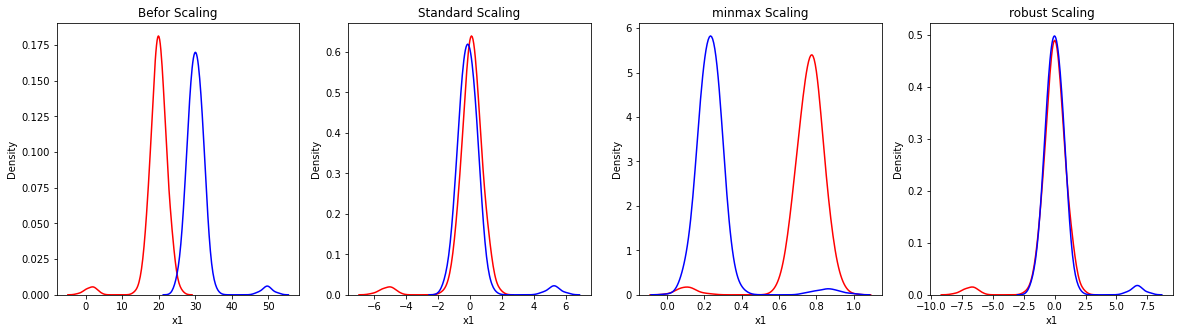

In [35]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title("Befor Scaling")
sns.kdeplot(x["x1"], ax=ax1, color = 'red')
sns.kdeplot(x["x2"], ax=ax1, color = 'blue')

ax2.set_title("Standard Scaling")
sns.kdeplot(standard_df["x1"], ax=ax2, color = 'red')
sns.kdeplot(standard_df["x2"], ax=ax2, color = 'blue')

ax3.set_title("minmax Scaling")
sns.kdeplot(minmax_df["x1"], ax=ax3, color = 'red')
sns.kdeplot(minmax_df["x2"], ax=ax3, color = 'blue')

ax4.set_title("robust Scaling")
sns.kdeplot(robust_df["x1"], ax=ax4, color = 'red')
sns.kdeplot(robust_df["x2"], ax=ax4, color = 'blue')


plt.show()

### StandardScaler(*, copy=True, with_mean=True, with_std=True)

In [24]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [25]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# Standard Scaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 scale 변환된 데이터 셋이 numpy ndarry로 변환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler
MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)

example :
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))
MinMaxScaler()
print(scaler.data_max_)
[ 1. 18.]
print(scaler.transform(data))
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
print(scaler.transform([[2, 2]]))
[[1.5 0. ]]

In [35]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환, fit() 과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 변환되어 이를 DataFrame으로 변환
iris_scaled_df1 = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scales.min())
print('\nfeature들의 최대 값')
print(iris_df_scales.max())

feature들의 최소 값


NameError: name 'iris_df_scales' is not defined

### RobustScaler
평균과 분산 대신에 중간값과 사분위값 사용
중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화 

특이 치에 강력한 통계를 사용하여 기능을 확장합니다.

이 스케일러는 중앙값을 제거하고 Quantile 범위 (기본값은 IQR : Interquartile Range)에 따라 데이터를 스케일링합니다. IQR은 1 분위 (25 분위)와 3 분위 (75 분위) 사이의 범위입니다.

센터링 및 스케일링은 학습 세트의 샘플에 대한 관련 통계를 계산하여 각 기능에서 독립적으로 발생합니다. 그런 다음 중앙값과 사 분위수 범위를 저장하여 transform방법을 사용하여 나중에 데이터에 사용합니다 .

(X, *, axis=0, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)

In [31]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import robust_scale

##########데이터 로드

#hour, attendance, score
df = pd.DataFrame([
    [2, 1, 3],
    [3, 2, 5],
    [3, 4, 7],
    [5, 5, 10],
    [7, 5, 12],
    [2, 5, 7],
    [8, 9, 13],
    [9, 10, 13],
    [6, 12, 12],
    [9, 2, 13],
    [6, 10, 12],
    [2, 4, 6]
], columns=['hour', 'attendance', 'score'])

##########데이터 분석

##########데이터 전처리

x_data = df.drop(['score'], axis=1) 
y_data = df['score']

#'''
transformer = RobustScaler()
transformer.fit(x_data)
#print(transformer.center_) #[5.5 5. ]
#print(transformer.scale_) #[4.5  5.75]
x_data = transformer.transform(x_data) 
#'''
'''
transformer = RobustScaler()
x_data = transformer.fit_transform(x_data)
'''
'''
x_data = robust_scale(x_data)
'''
print(x_data)
'''
[[-0.77777778 -0.69565217]
 [-0.55555556 -0.52173913]
 [-0.55555556 -0.17391304]
 [-0.11111111  0.        ]
 [ 0.33333333  0.        ]
 [-0.77777778  0.        ]
 [ 0.55555556  0.69565217]
 [ 0.77777778  0.86956522]
 [ 0.11111111  1.2173913 ]
 [ 0.77777778 -0.52173913]
 [ 0.11111111  0.86956522]
 [-0.77777778 -0.17391304]]
'''

[[-0.77777778 -0.69565217]
 [-0.55555556 -0.52173913]
 [-0.55555556 -0.17391304]
 [-0.11111111  0.        ]
 [ 0.33333333  0.        ]
 [-0.77777778  0.        ]
 [ 0.55555556  0.69565217]
 [ 0.77777778  0.86956522]
 [ 0.11111111  1.2173913 ]
 [ 0.77777778 -0.52173913]
 [ 0.11111111  0.86956522]
 [-0.77777778 -0.17391304]]


'\n[[-0.77777778 -0.69565217]\n [-0.55555556 -0.52173913]\n [-0.55555556 -0.17391304]\n [-0.11111111  0.        ]\n [ 0.33333333  0.        ]\n [-0.77777778  0.        ]\n [ 0.55555556  0.69565217]\n [ 0.77777778  0.86956522]\n [ 0.11111111  1.2173913 ]\n [ 0.77777778 -0.52173913]\n [ 0.11111111  0.86956522]\n [-0.77777778 -0.17391304]]\n'

In [32]:
from sklearn.preprocessing import RobustScaler
rbscaler = RobustScaler()
rbscaler.fit(iris_df)
iris_rbscaled = rbscaler.transform(iris_df)
iris_df_rbscaled = pd.DataFrame(data=iris_rbscaled, columns=iris.feature_names)
iris_df_rbscaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333
...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667
146,0.384615,-1.0,0.185714,0.400000
147,0.538462,0.0,0.242857,0.466667
148,0.307692,0.8,0.300000,0.666667


NameError: name 'iris_df_scales' is not defined

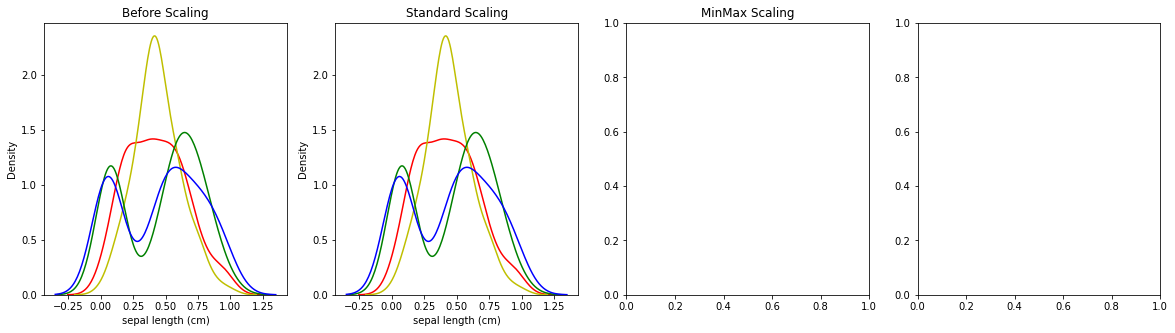

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(iris_df_scaled['sepal length (cm)'], ax = ax1, color = 'r')
sns.kdeplot(iris_df_scaled['sepal width (cm)'], ax = ax1, color = 'y')
sns.kdeplot(iris_df_scaled['petal length (cm)'], ax = ax1, color = 'g')
sns.kdeplot(iris_df_scaled['petal width (cm)'], ax = ax1, color = 'b')
ax2.set_title('Standard Scaling')
sns.kdeplot(iris_scaled_df1['sepal length (cm)'], ax = ax2, color = 'r')
sns.kdeplot(iris_scaled_df1['sepal width (cm)'], ax = ax2, color = 'y')
sns.kdeplot(iris_scaled_df1['petal length (cm)'], ax = ax2, color = 'g')
sns.kdeplot(iris_scaled_df1['petal width (cm)'], ax = ax2, color = 'b')
ax3.set_title('MinMax Scaling')
sns.kdeplot(iris_df_scales['sepal length (cm)'], ax = ax3, color = 'r')
sns.kdeplot(iris_df_scales['sepal width (cm)'], ax = ax3, color = 'y')
sns.kdeplot(iris_df_scales['petal length (cm)'], ax = ax3, color = 'g')
sns.kdeplot(iris_df_scales['petal width (cm)'], ax = ax3, color = 'b')
ax4.set_title('Robust Scaling')
sns.kdeplot(iris_df_rbscaled['sepal length (cm)'], ax = ax4, color = 'r')
sns.kdeplot(iris_df_rbscaled['sepal width (cm)'], ax = ax4, color = 'y')
sns.kdeplot(iris_df_rbscaled['petal length (cm)'], ax = ax4, color = 'g')
sns.kdeplot(iris_df_rbscaled['petal width (cm)'], ax = ax4, color = 'b')
plt.show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

titanic_df = pd.read_csv('C:/apps/ml/datasets/titanic.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
titanic_df.drop(columns = ['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch','Ticket', 'Fare', 'Cabin'], inplace=True)

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Embarked  889 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB


In [17]:
titanic_df['Pclass'].fillna(titanic_df['Pclass'].mean(), inplace = True)
titanic_df['Age'].fillna('N',inplace=True)
titanic_df['Sex'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수' ,titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수 0


In [18]:
print('데이터 세트 Null 값 갯수' , titanic_df.isnull().sum())

데이터 세트 Null 값 갯수 Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64


In [19]:
print(' Pclass 값 분포 :\n' , titanic_df['Pclass'].value_counts())
print('\n Age 값 분포 : \n' , titanic_df['Age'].value_counts())
print('\n Sex 값 분포 : \n' , titanic_df['Sex'].value_counts())
print('\n Embarked 값 분포 : \n' , titanic_df['Embarked'].value_counts())

 Pclass 값 분포 :
 3    491
1    216
2    184
Name: Pclass, dtype: int64

 Age 값 분포 : 
 N       177
24.0     30
22.0     27
18.0     26
28.0     25
       ... 
36.5      1
55.5      1
0.92      1
23.5      1
74.0      1
Name: Age, Length: 89, dtype: int64

 Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

 Embarked 값 분포 : 
 S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [37]:
titanic_df['Pclass'] = titanic_df['Pclass'].str[:1]
print(titanic_df['Pclass'].head(3))

AttributeError: Can only use .str accessor with string values!

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})

In [39]:
x

,x1,x2
0,20.873548,30.822356
1,20.773956,26.999667
2,18.316110,30.887976
3,21.123012,33.261848
4,21.188127,33.805392
...,...,...
1020,-2.747058,50.748430
1021,3.947202,46.307712
1022,1.030150,48.770364
1023,1.588940,45.588702


In [40]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns=['x1', 'x2'])
standard_df

,x1,x2
0,0.360063,0.079211
1,0.331632,-0.979179
2,-0.370028,0.097379
3,0.431279,0.754635
4,0.449868,0.905126
...,...,...
1020,-6.383092,5.596157
1021,-4.472031,4.366652
1022,-5.304784,5.048488
1023,-5.145262,4.167579


In [41]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns=['x1', 'x2'])
minmax_df

,x1,x2
0,0.811254,0.239811
1,0.807833,0.109127
2,0.723418,0.242055
3,0.819821,0.323209
4,0.822058,0.341791
...,...,...
1020,0.000000,0.921014
1021,0.229915,0.769201
1022,0.129729,0.853391
1023,0.148921,0.744621


In [42]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns=['x1', 'x2'])
robust_df

,x1,x2
0,0.317753,0.236262
1,0.282941,-1.138754
2,-0.576203,0.259866
3,0.404954,1.113744
4,0.427715,1.309256
...,...,...
1020,-7.938870,7.403642
1021,-5.598880,5.806322
1022,-6.618540,6.692135
1023,-6.423214,5.547695


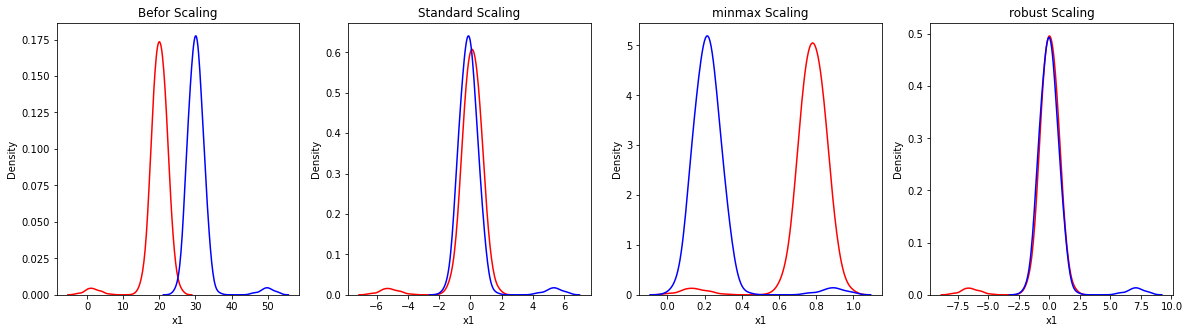

In [43]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title("Befor Scaling")
sns.kdeplot(x["x1"], ax=ax1, color = 'red')
sns.kdeplot(x["x2"], ax=ax1, color = 'blue')

ax2.set_title("Standard Scaling")
sns.kdeplot(standard_df["x1"], ax=ax2, color = 'red')
sns.kdeplot(standard_df["x2"], ax=ax2, color = 'blue')

ax3.set_title("minmax Scaling")
sns.kdeplot(minmax_df["x1"], ax=ax3, color = 'red')
sns.kdeplot(minmax_df["x2"], ax=ax3, color = 'blue')

ax4.set_title("robust Scaling")
sns.kdeplot(robust_df["x1"], ax=ax4, color = 'red')
sns.kdeplot(robust_df["x2"], ax=ax4, color = 'blue')


plt.show()